# Exploratory Data Analysis (EDA) Restart

This notebook provides a fresh start for EDA on the Porto Seguro Safe Driver Prediction dataset. We will:
- Import required libraries
- Load and preview the data
- Check for missing values
- Generate summary statistics
- Visualize feature distributions
- Explore correlations


## 1. Import Required Libraries

In [1]:
# Import essential libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load the Dataset

In [2]:
# Load train, test, and sample submission datasets
DATA_PATH = Path('.')
train_df = pd.read_csv(DATA_PATH / 'train.csv')
test_df = pd.read_csv(DATA_PATH / 'test.csv')
submission_df = pd.read_csv(DATA_PATH / 'sample_submission.csv')

print('Data files loaded successfully!')

Data files loaded successfully!


## 3. Preview the Data

In [3]:
# Preview the first few rows of each dataset
print('Train Data:')
display(train_df.head())
print('\nTest Data:')
display(test_df.head())
print('\nSample Submission:')
display(submission_df.head())

Train Data:


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0



Test Data:


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1



Sample Submission:


,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


## 4. Check for Missing Values

In [4]:
# Check for missing values in each dataset
print('Missing values in TRAIN:')
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
if train_df.isnull().sum().sum() == 0:
    print('No missing values in train.csv')

print('\nMissing values in TEST:')
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])
if test_df.isnull().sum().sum() == 0:
    print('No missing values in test.csv')

print('\nMissing values in SAMPLE SUBMISSION:')
print(submission_df.isnull().sum()[submission_df.isnull().sum() > 0])
if submission_df.isnull().sum().sum() == 0:
    print('No missing values in sample_submission.csv')

Missing values in TRAIN:
Series([], dtype: int64)
No missing values in train.csv

Missing values in TEST:
Series([], dtype: int64)
No missing values in test.csv

Missing values in SAMPLE SUBMISSION:
Series([], dtype: int64)
No missing values in sample_submission.csv


## 5. Summary Statistics

In [5]:
# Descriptive statistics for numerical features
print('Train Data - Numerical Features:')
display(train_df.describe().T)

# Descriptive statistics for categorical features (if any)
cat_cols = train_df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    print('\nTrain Data - Categorical Features:')
    for col in cat_cols:
        print(f'{col}:')
        print(train_df[col].value_counts().head())
        print()

Train Data - Numerical Features:


,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


## 6. Visualize Feature Distributions

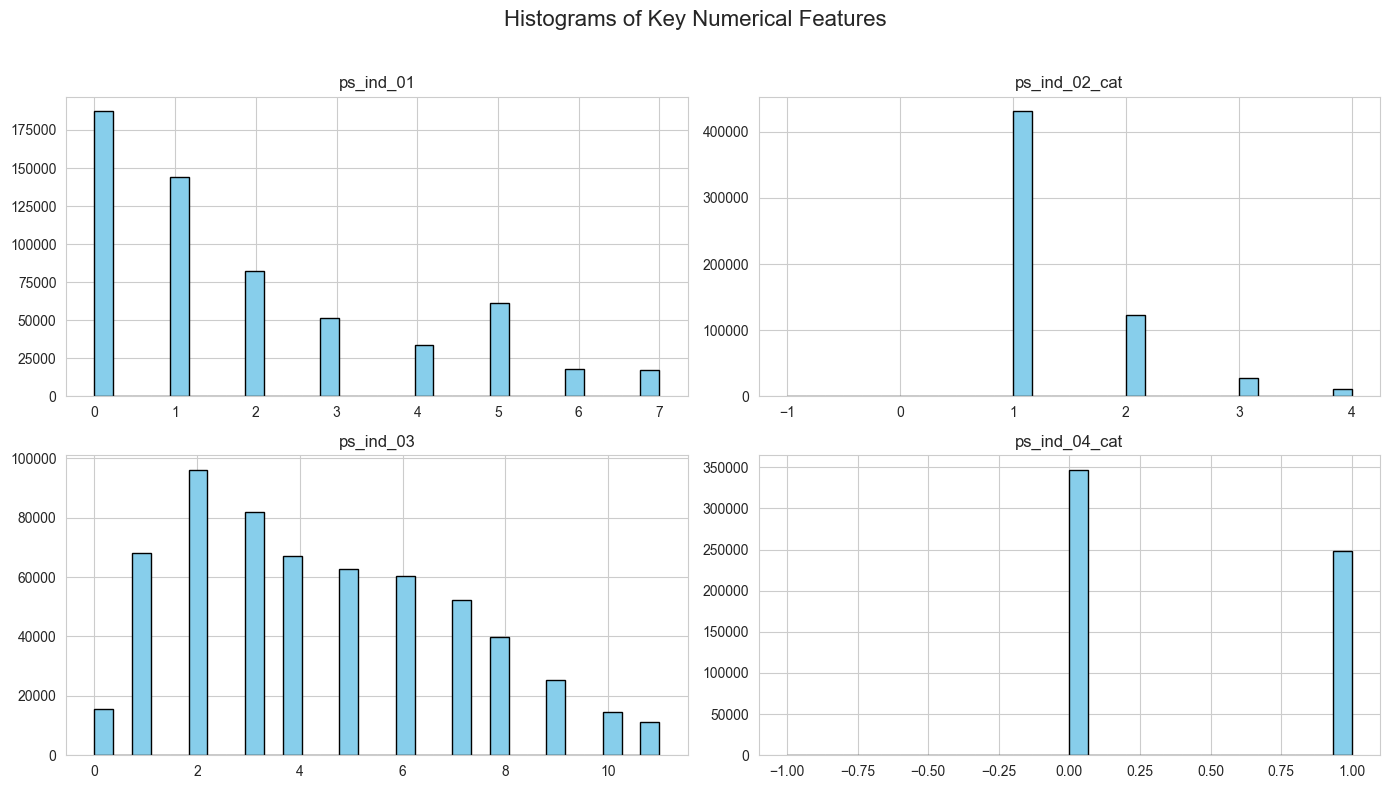

In [6]:
# Visualize distributions for a few key features
num_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms for the first 4 numerical features (excluding id and target)
features_to_plot = [f for f in num_features if f not in ['id', 'target']][:4]
train_df[features_to_plot].hist(bins=30, figsize=(14, 8), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Key Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 7. Correlation Matrix

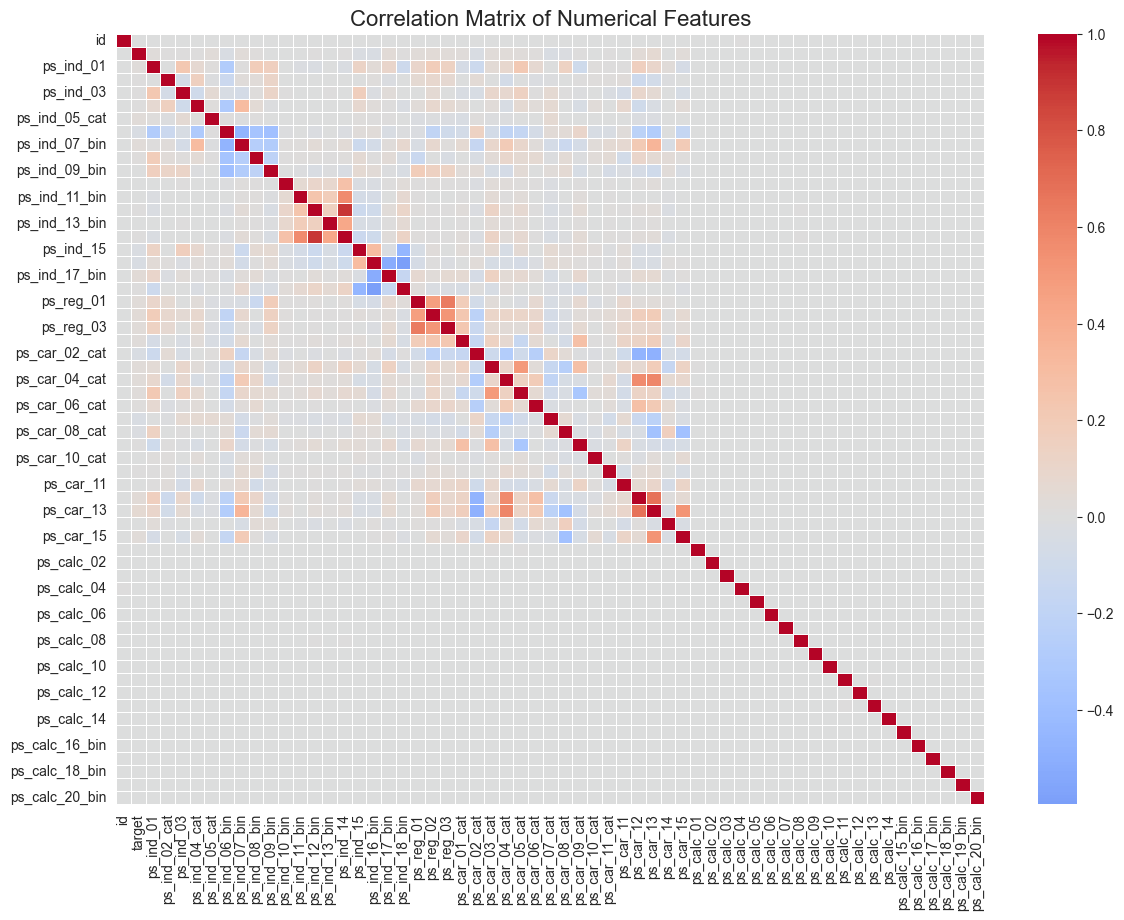

In [7]:
# Compute and visualize the correlation matrix for numerical features
corr = train_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## Feature Importance via Correlation with Target

Let's compute the correlation between each feature and the target variable to identify which features are most associated with claims.

Top 10 features most correlated with claims (target):


ps_car_13        0.053899
ps_car_12        0.038790
ps_ind_17_bin    0.037053
ps_car_07_cat   -0.036395
ps_reg_02        0.034800
ps_ind_07_bin    0.034218
ps_ind_06_bin   -0.034017
ps_car_04_cat    0.032900
ps_car_03_cat    0.032401
ps_car_02_cat   -0.031534
Name: target, dtype: float64

/var/folders/bk/_17m_lsx3nbbc6k5q3bxhpfw0000gn/T/ipykernel_99924/3387606244.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.head(10).values, y=corr_with_target.head(10).index, palette='viridis')


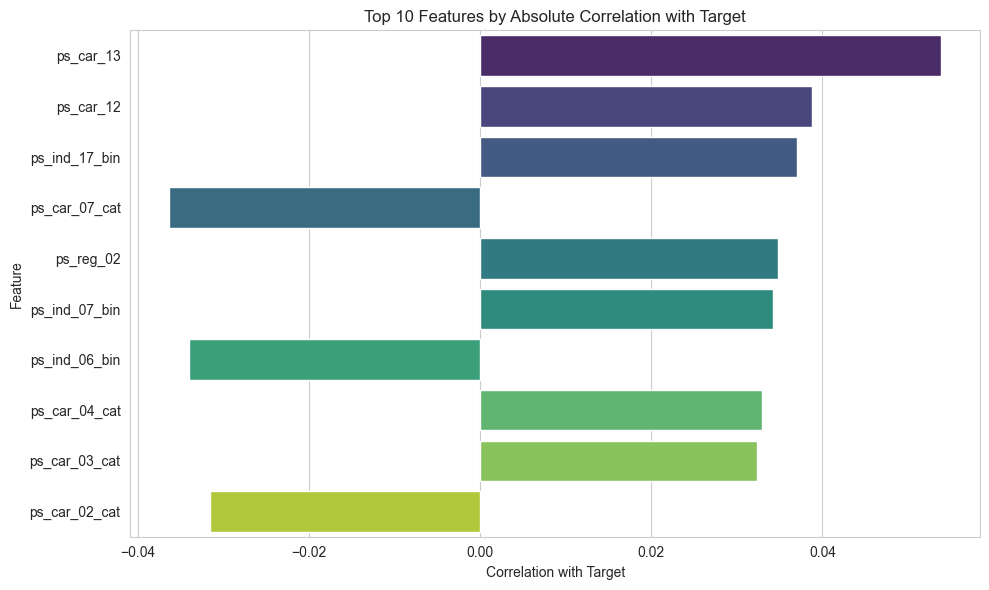

In [8]:
# Calculate correlation of each feature with the target variable
corr_with_target = train_df.corr()['target'].drop(['id', 'target']).sort_values(key=abs, ascending=False)

# Display top 10 features most correlated with the target
print('Top 10 features most correlated with claims (target):')
display(corr_with_target.head(10))

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.head(10).values, y=corr_with_target.head(10).index, palette='viridis')
plt.title('Top 10 Features by Absolute Correlation with Target')
plt.xlabel('Correlation with Target')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Explanation:**

The bar chart above shows the top 10 features with the highest absolute correlation to the target variable (`claims`).

- **How it works:** Correlation measures the strength and direction of a linear relationship between each feature and the target. Features with higher absolute correlation values (closer to 1 or -1) are more strongly associated with the likelihood of a claim.
- **Interpretation:** The features at the top of the chart are those whose values change most consistently with the target (claims). A positive correlation means higher feature values are associated with more claims, while a negative correlation means higher feature values are associated with fewer claims.
- **Why these features:** We calculated the correlation for every numerical feature in the dataset and sorted them by the absolute value of their correlation with the target. The top 10 are shown in the graph. These features are likely to be more useful for predicting claims, especially in linear models.

**Note:** Correlation only captures linear relationships and does not account for interactions or non-linear effects. For more robust feature importance, consider using tree-based models or permutation importance.

## Feature Importance Using a Tree-Based Model

Let's use a Random Forest classifier to estimate feature importances for predicting claims. Tree-based models can capture non-linear relationships and interactions between features, providing a more robust measure of importance.

Top 10 features by Random Forest importance:
ps_car_13: 0.0568
ps_reg_03: 0.0512
ps_car_14: 0.0414
ps_calc_10: 0.0369
ps_calc_14: 0.0360
ps_calc_11: 0.0334
ps_ind_15: 0.0324
ps_ind_03: 0.0323
ps_car_11_cat: 0.0321
ps_calc_01: 0.0310


/var/folders/bk/_17m_lsx3nbbc6k5q3bxhpfw0000gn/T/ipykernel_99924/2350818672.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:top_n]], y=[features[i] for i in indices[:top_n]], palette='crest')


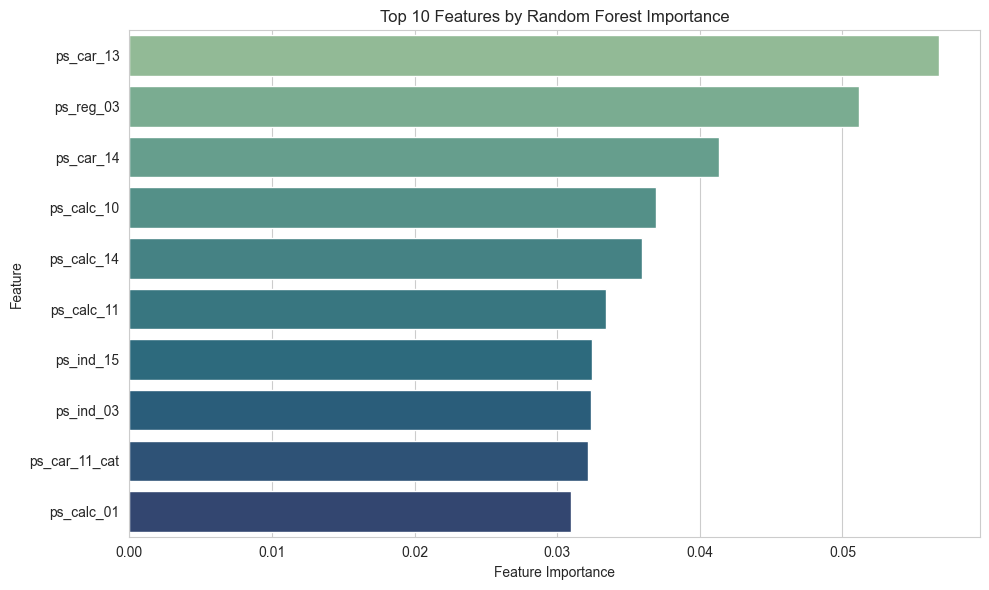

In [9]:
# Feature importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Prepare data (drop id, handle missing values if any)
features = [col for col in train_df.columns if col not in ['id', 'target']]
X = train_df[features]
y = train_df['target']

# Impute missing values if necessary
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split for speed (optional, use a subset for quick demo)
X_train, _, y_train, _ = train_test_split(X_imputed, y, test_size=0.7, random_state=42, stratify=y)

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Show top 10 features
top_n = 10
print('Top 10 features by Random Forest importance:')
for i in range(top_n):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices[:top_n]], y=[features[i] for i in indices[:top_n]], palette='crest')
plt.title('Top 10 Features by Random Forest Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Decision Tree Model Using Top Features

Let's build a decision tree classifier to predict whether a customer will file a claim, using only the most important features identified by the Random Forest. We'll train, evaluate, and visualize the tree.

Decision Tree Accuracy: 0.9635536838332475

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.00      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


Confusion Matrix:
[[172056      0]
 [  6508      0]]


/Users/matt/aipm-1711/ds-safe-driver-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/matt/aipm-1711/ds-safe-driver-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/matt/aipm-1711/ds-safe-driver-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

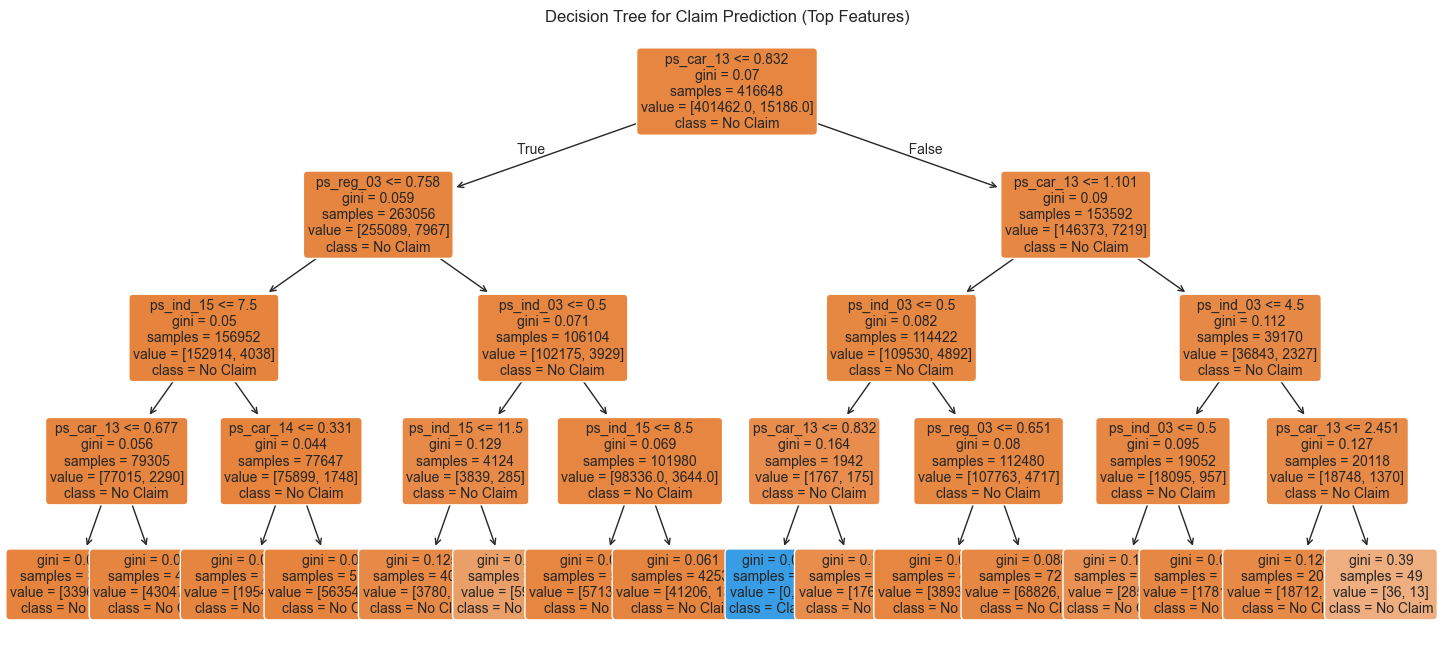

In [11]:
# Build and evaluate a decision tree using top features
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the same top_n features from Random Forest
selected_features = [features[i] for i in indices[:top_n]]
X_selected = train_df[selected_features]

# Impute missing values
X_selected_imputed = imputer.fit_transform(X_selected)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Build decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=selected_features, class_names=['No Claim', 'Claim'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Claim Prediction (Top Features)')
plt.show()

**Decision Tree Results & Visualization**

- The table below summarizes the model's accuracy, precision, recall, and confusion matrix for claim prediction.
- The decision tree plot is color-coded and shows how the top features split the data to predict claims.
- Each node displays the feature, threshold, number of samples, and class distribution.
- The tree depth is limited for clarity; deeper trees can capture more complexity but may be harder to interpret.

**Tips for Readability:**
- Focus on the first few splits (top of the tree) to see which features are most decisive.
- Use the confusion matrix to understand prediction errors (false positives/negatives).
- For more readable trees, try lowering `max_depth` or plotting only the top levels.